**Linking Google Colab to Drive**

In [191]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


**Necessary Imports**

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Datasets**

In [168]:
customers = pd.read_csv("/content/drive/MyDrive/Zeotap/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Zeotap/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zeotap/Transactions.csv")

**EDA**

In [169]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [170]:
transactions = transactions.merge(products, on="ProductID", how="left")

In [171]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86


**Grouping of Customers based on TotalSum, MeanSum and Purchase Frequency**

In [172]:
customer_transactions = transactions.groupby("CustomerID").agg(
    TotalSpend=("TotalValue", "sum"),
    AvgOrderValue=("TotalValue", "mean"),
    PurchaseFrequency=("TransactionID", "count"),
).reset_index()

In [173]:
customer_transactions

,CustomerID,TotalSpend,AvgOrderValue,PurchaseFrequency
0,C0001,3354.52,670.904000,5
1,C0002,1862.74,465.685000,4
2,C0003,2725.38,681.345000,4
3,C0004,5354.88,669.360000,8
4,C0005,2034.24,678.080000,3
...,...,...,...,...
194,C0196,4982.88,1245.720000,4
195,C0197,1928.65,642.883333,3
196,C0198,931.83,465.915000,2
197,C0199,1979.28,494.820000,4


**Category Wise Count of Products sold**

In [174]:
category_pivot = transactions.pivot_table(index="CustomerID", columns="Category", values="Quantity", aggfunc="sum", fill_value=0)

In [148]:
category_pivot

Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,2,0,7,3
C0002,0,4,0,6
C0003,0,4,4,6
C0004,8,0,6,9
C0005,0,0,4,3
...,...,...,...,...
C0196,3,4,0,5
C0197,0,0,6,3
C0198,0,2,1,0


In [65]:
product_pivot = transactions.pivot_table(index="CustomerID", columns="ProductID", values="Quantity", aggfunc="sum", fill_value=0)

In [66]:
product_pivot

ProductID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
C0002,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
C0003,0,4,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0004,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,0,0
C0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left").fillna(0)
customer_data = customer_data.merge(category_pivot, on="CustomerID", how="left").fillna(0)
# customer_data = customer_data.merge(product_pivot, on="CustomerID", how="left").fillna(0)

In [150]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,AvgOrderValue,PurchaseFrequency,Books,Clothing,Electronics,Home Decor
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,670.904,5.0,2.0,0.0,7.0,3.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,465.685,4.0,0.0,4.0,0.0,6.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,681.345,4.0,0.0,4.0,4.0,6.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,669.360,8.0,8.0,0.0,6.0,9.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,678.080,3.0,0.0,0.0,4.0,3.0


**ONE-HOT Encoding for transfroming categorical values to numberical entities**

In [176]:
encoder = OneHotEncoder(sparse_output=False, drop="first")

In [177]:
region_encoded = encoder.fit_transform(customer_data[["Region"]])
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(["Region"]))

In [192]:
region_df

,Region_Europe,Region_North America,Region_South America
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,0.0
...,...,...,...
195,1.0,0.0,0.0
196,1.0,0.0,0.0
197,1.0,0.0,0.0
198,1.0,0.0,0.0


In [178]:
customer_data = pd.concat([customer_data, region_df], axis=1).drop(columns=["Region", "CustomerName"])

In [179]:
customer_data

,CustomerID,SignupDate,TotalSpend,AvgOrderValue,PurchaseFrequency,Books,Clothing,Electronics,Home Decor,Region_Europe,Region_North America,Region_South America
0,C0001,2022-07-10,3354.52,670.904000,5.0,2.0,0.0,7.0,3.0,0.0,0.0,1.0
1,C0002,2022-02-13,1862.74,465.685000,4.0,0.0,4.0,0.0,6.0,0.0,0.0,0.0
2,C0003,2024-03-07,2725.38,681.345000,4.0,0.0,4.0,4.0,6.0,0.0,0.0,1.0
3,C0004,2022-10-09,5354.88,669.360000,8.0,8.0,0.0,6.0,9.0,0.0,0.0,1.0
4,C0005,2022-08-15,2034.24,678.080000,3.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,2022-06-07,4982.88,1245.720000,4.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0
196,C0197,2023-03-21,1928.65,642.883333,3.0,0.0,0.0,6.0,3.0,1.0,0.0,0.0
197,C0198,2022-02-27,931.83,465.915000,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
198,C0199,2022-12-03,1979.28,494.820000,4.0,0.0,0.0,3.0,6.0,1.0,0.0,0.0


In [ ]:
# customer_data["DaysSinceSignup"]

In [180]:
customer_data

,CustomerID,SignupDate,TotalSpend,AvgOrderValue,PurchaseFrequency,Books,Clothing,Electronics,Home Decor,Region_Europe,Region_North America,Region_South America
0,C0001,2022-07-10,3354.52,670.904000,5.0,2.0,0.0,7.0,3.0,0.0,0.0,1.0
1,C0002,2022-02-13,1862.74,465.685000,4.0,0.0,4.0,0.0,6.0,0.0,0.0,0.0
2,C0003,2024-03-07,2725.38,681.345000,4.0,0.0,4.0,4.0,6.0,0.0,0.0,1.0
3,C0004,2022-10-09,5354.88,669.360000,8.0,8.0,0.0,6.0,9.0,0.0,0.0,1.0
4,C0005,2022-08-15,2034.24,678.080000,3.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,2022-06-07,4982.88,1245.720000,4.0,3.0,4.0,0.0,5.0,1.0,0.0,0.0
196,C0197,2023-03-21,1928.65,642.883333,3.0,0.0,0.0,6.0,3.0,1.0,0.0,0.0
197,C0198,2022-02-27,931.83,465.915000,2.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
198,C0199,2022-12-03,1979.28,494.820000,4.0,0.0,0.0,3.0,6.0,1.0,0.0,0.0


In [181]:
customer_data.drop(columns=["SignupDate"], inplace=True)

In [156]:
customer_data.to_csv("customer_data.csv", index=False)

**Scaling the data to a common scale for applying Cosine Similarity**

In [182]:
scaler = StandardScaler()
# numeric_cols = ["TotalSpend", "AvgOrderValue", "PurchaseFrequency"] + list(category_pivot.columns) + list(product_pivot.columns)
numeric_cols = ["TotalSpend", "AvgOrderValue", "PurchaseFrequency"] + list(category_pivot.columns)
customer_data[numeric_cols] = scaler.fit_transform(customer_data[numeric_cols])

In [183]:
customer_data

,CustomerID,TotalSpend,AvgOrderValue,PurchaseFrequency,Books,Clothing,Electronics,Home Decor,Region_Europe,Region_North America,Region_South America
0,C0001,-0.051884,-0.054781,0.000000,-0.458725,-0.959254,1.26084,-0.063782,0.0,0.0,1.0
1,C0002,-0.862714,-0.903985,-0.451294,-1.111714,0.341430,-1.02270,0.917482,0.0,0.0,0.0
2,C0003,-0.393842,-0.011575,-0.451294,-1.111714,0.341430,0.28218,0.917482,0.0,0.0,1.0
3,C0004,1.035375,-0.061170,1.353881,1.500243,-0.959254,0.93462,1.898745,0.0,0.0,1.0
4,C0005,-0.769499,-0.025086,-0.902587,-1.111714,-0.959254,0.28218,-0.063782,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,C0196,0.833181,2.323831,-0.451294,-0.132230,0.341430,-1.02270,0.590394,1.0,0.0,0.0
196,C0197,-0.826890,-0.170731,-0.902587,-1.111714,-0.959254,0.93462,-0.063782,1.0,0.0,0.0
197,C0198,-1.368694,-0.903033,-1.353881,-1.111714,-0.308912,-0.69648,-1.045046,1.0,0.0,0.0
198,C0199,-0.799371,-0.783423,-0.451294,-1.111714,-0.959254,-0.04404,0.917482,1.0,0.0,0.0


**Apply Cosine-Similarity Technique to find relevant/matching customers**

In [184]:
customer_matrix = customer_data.drop(columns=["CustomerID"]).values
similarity_matrix = cosine_similarity(customer_matrix)

In [185]:
similarity_matrix

array([[ 1.        , -0.2479218 ,  0.40769918, ...,  0.02055845,
         0.31043772, -0.60268166],
       [-0.2479218 ,  1.        ,  0.57679864, ...,  0.53757764,
         0.64997537, -0.09474476],
       [ 0.40769918,  0.57679864,  1.        , ...,  0.20520143,
         0.50881451, -0.00370489],
       ...,
       [ 0.02055845,  0.53757764,  0.20520143, ...,  1.        ,
         0.59223786, -0.40796233],
       [ 0.31043772,  0.64997537,  0.50881451, ...,  0.59223786,
         1.        , -0.56166467],
       [-0.60268166, -0.09474476, -0.00370489, ..., -0.40796233,
        -0.56166467,  1.        ]])

**Plot to visualise similarity**

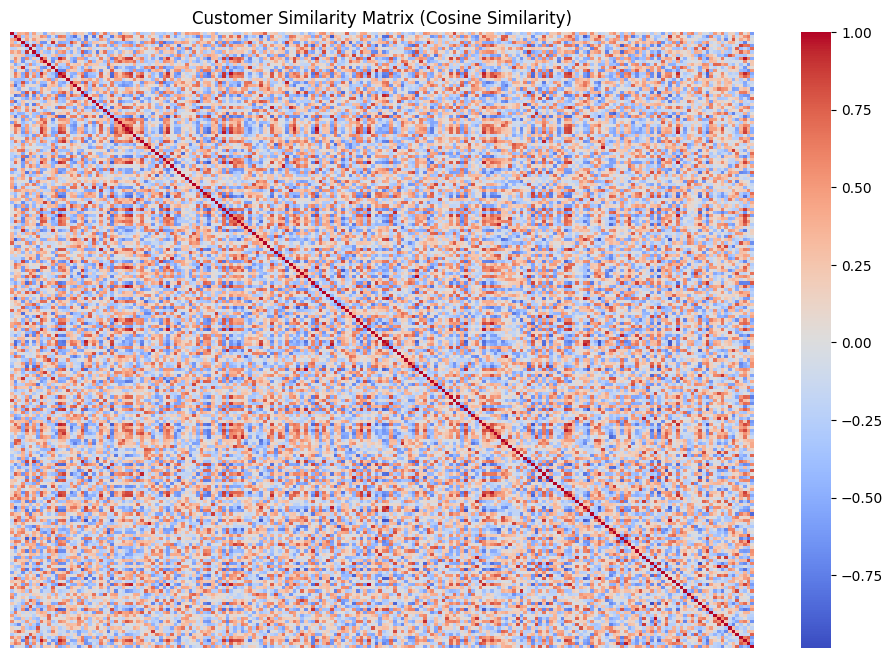

In [186]:
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Customer Similarity Matrix (Cosine Similarity)")
plt.show()

**Heatmap to visualise dependedenies between different features**

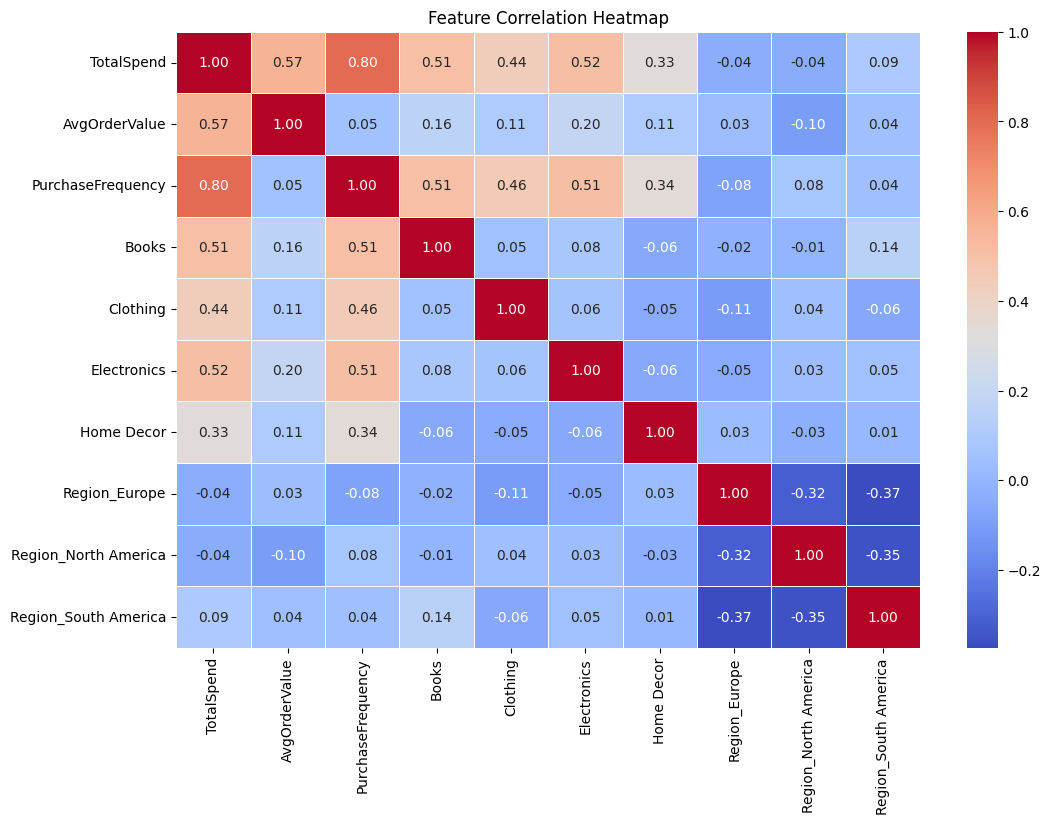

In [187]:
correlation_matrix = customer_data.drop(columns=["CustomerID"]).corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Finding matching Customers for the first 20 customers by applying similarity**

In [188]:
customer_ids = customer_data["CustomerID"].values
lookalike_dict = {}
for i, cust_id in enumerate(customer_ids[:20]):
    similar_indices = np.argsort(similarity_matrix[i])[::-1][1:4]  # Top 3 excluding itself
    similar_customers = [(customer_ids[j], round(similarity_matrix[i][j], 4)) for j in similar_indices]
    lookalike_dict[cust_id] = similar_customers

# Convert to DataFrame and save as CSV
lookalike_df = pd.DataFrame(list(lookalike_dict.items()), columns=["cust_id", "lookalikes"])

In [189]:
lookalike_df


,cust_id,lookalikes
0,C0001,"[(C0120, 0.8311), (C0091, 0.7428), (C0069, 0.7..."
1,C0002,"[(C0178, 0.8821), (C0159, 0.8614), (C0031, 0.7..."
2,C0003,"[(C0031, 0.7948), (C0133, 0.7924), (C0195, 0.7..."
3,C0004,"[(C0012, 0.9193), (C0113, 0.9017), (C0065, 0.8..."
4,C0005,"[(C0007, 0.8992), (C0197, 0.8613), (C0095, 0.8..."
5,C0006,"[(C0187, 0.814), (C0196, 0.767), (C0185, 0.743)]"
6,C0007,"[(C0005, 0.8992), (C0140, 0.8901), (C0085, 0.8..."
7,C0008,"[(C0093, 0.8718), (C0109, 0.8165), (C0194, 0.8..."
8,C0009,"[(C0198, 0.9622), (C0060, 0.9389), (C0014, 0.9..."
9,C0010,"[(C0111, 0.8793), (C0056, 0.8599), (C0077, 0.7..."


**Making up the csv file of look-alike customers**

In [190]:
lookalike_df.to_csv("Lookalike.csv",index=False)